# Advanced Statistical Methods in Python 
## Part 5
### Section 37

Cluster analysis is a multivariate statistical technique that groups observations on the basis some of their features or variables they are described by. Observations in a dataset can be divided intro groups. Here's a list of six countries: USA, Canada, Australia, Germany, France, UK, and Australia. Imagine we performed cluster analysis, and we get 3 clusters for countries in North America, Europe, and Australia. These clusters were clustered by geographic proximity. 

Say we get two clusters, one with Canada, US, Germany, UK, and France and the second is just Australia. These two would be northern and southern hemisphere. However, clusters aren't always as easy. Cluster analysis can be extremely intuitive but sometimes tricky. The goal of clustering is to maximize the similarity of observations within a cluster and maximize the dissimilarity between clusters. That of course is done to respect with some feature or features. 

Why is it useful? There are many applications of clustering: marketing segmentation and image segementation. Market Segmentation is used to identify to target customers. Clustering is often used as a preliminary step in other types of analysis. Cluster analysis allows us to explore the data and identify patterns. Image segmentation uses clusters of colors, and for some images you would need 16M clusters to get to the final image. Clustering has made way for better techniques to allow machines to detect the objects around them. 

Clustering seems similar to classification, but is in fact very different. We don't have labels, which is unsupervised learning. The output we get is something we must name ourselves.Classification is about predicting an output category given input data. Clustering is about grouping data points togetehr based on similarities among them and difference from others. 

Math prerequisites: distance between two data points and centroids. Distance can be calculated as a Euclidean distance, where Pythagoreas theorem is used to find the distance between two points. In n-dimensional space, we can calculate distance between points by using the Euclidean distance formula. A centroid is the mean position of a group of points. 

### Section 38
How do we perform clustering in practice? The most populat is K-Means. First, we must choose the number of clusters we'd like to have. K stands for the number of clusters we are trying to identify. then specify the cluster seeds, a seed is basically a starting centroid. It is chosen at random. The following step is to assign each point to a centroid. In this way, we can colour all points on the graph based on their Euclidean distance from the seeds. The final step is to adjust the centroid. Then we repeat the last two steps, until we can no longer reassign points and the clustering ends. K-means is an iterative process.

For this next section, I have found my own data source of this Mall Customer data with 5 columns:

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('~/Documents/GitHub/professional-development/2020 Data Science Bootcamp/Mall_Customers.csv')
df.head()

,CustomerID,Genre,Age,Annual_Income_(k$),Spending_Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [19]:
import numpy as np
import seaborn as sns
sns.set()
from sklearn.cluster import KMeans

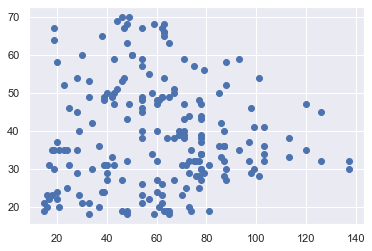

In [6]:
# Plot the data
plt.scatter(df['Annual_Income_(k$)'], df['Age'])

In [16]:
# Select the features
x = df.iloc[:, 2:4]

In [17]:
x

,Age,Annual_Income_(k$)
0,19,15
1,21,15
2,20,16
3,23,16
4,31,17
...,...,...
195,35,120
196,45,126
197,32,126
198,32,137


In [28]:
# Declare a variable called KMeans
kmeans = KMeans(3)

In [29]:
# this line of code will k means clustering with 2 clusters
kmeans.fit(x)

KMeans(n_clusters=3)

In [30]:
identified_clusters = kmeans.fit_predict(x)
identified_clusters

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 2, 2, 1, 2, 1, 2, 2, 1, 1, 2, 1, 2, 1, 1, 1, 1,
       1, 2, 2, 2, 2, 2, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2], dtype=int32)

In [31]:
data_with_clusters = df.copy()
data_with_clusters['Cluster'] = identified_clusters
data_with_clusters

,CustomerID,Genre,Age,Annual_Income_(k$),Spending_Score,Cluster
0,1,Male,19,15,39,0
1,2,Male,21,15,81,0
2,3,Female,20,16,6,0
3,4,Female,23,16,77,0
4,5,Female,31,17,40,0
...,...,...,...,...,...,...
195,196,Female,35,120,79,2
196,197,Female,45,126,28,2
197,198,Male,32,126,74,2
198,199,Male,32,137,18,2


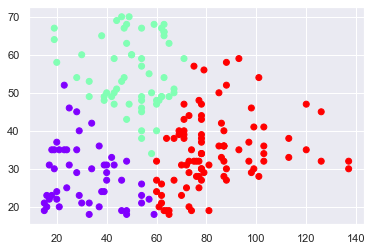

In [32]:
# Plots our clusters
plt.scatter(data_with_clusters['Annual_Income_(k$)'], data_with_clusters['Age'], 
            c=data_with_clusters['Cluster'], cmap = 'rainbow')

In [52]:
data_mapped = df.copy()
data_mapped['Gender'] = data_mapped['Genre'].map({'Male': 0, 'Female': 1})
data_mapped

,CustomerID,Genre,Age,Annual_Income_(k$),Spending_Score,Gender
0,1,Male,19,15,39,0
1,2,Male,21,15,81,0
2,3,Female,20,16,6,1
3,4,Female,23,16,77,1
4,5,Female,31,17,40,1
...,...,...,...,...,...,...
195,196,Female,35,120,79,1
196,197,Female,45,126,28,1
197,198,Male,32,126,74,0
198,199,Male,32,137,18,0


In [60]:
# Select the features you want to use for clustering
x = data_mapped.iloc[:, [5]]
x

,Gender
0,0
1,0
2,1
3,1
4,1
...,...
195,1
196,1
197,0
198,0


In [61]:
# Declare a variable called KMeans
kmeans = KMeans(2)

In [62]:
# this line of code will k means clustering with 2 clusters
kmeans.fit(x)

KMeans(n_clusters=2)

In [63]:
identified_clusters = kmeans.fit_predict(x)
identified_clusters

array([0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       0, 0], dtype=int32)

In [64]:
data_mapped = df.copy()
data_mapped['Cluster'] = identified_clusters
data_mapped

,CustomerID,Genre,Age,Annual_Income_(k$),Spending_Score,Cluster
0,1,Male,19,15,39,0
1,2,Male,21,15,81,0
2,3,Female,20,16,6,1
3,4,Female,23,16,77,1
4,5,Female,31,17,40,1
...,...,...,...,...,...,...
195,196,Female,35,120,79,1
196,197,Female,45,126,28,1
197,198,Male,32,126,74,0
198,199,Male,32,137,18,0


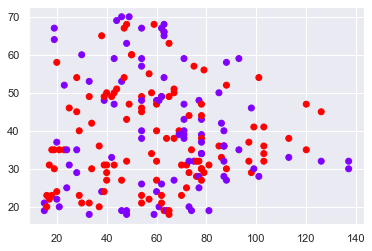

In [65]:
# Plots our clusters
plt.scatter(data_mapped['Annual_Income_(k$)'], data_mapped['Age'], 
            c=data_mapped['Cluster'], cmap = 'rainbow')

Is there a criterion for setting the proper number of clusters? The most widely adopted criterion is the elbow method. The distance between points in a cluster or Within cluster sum of squares or WCSS. WCSS is a measure developed within the ANOVA framework. If we minimize WCSS, we will get the ideal number of clusters. We don't want it to be minimized, we want it to be as small as possible, while also keeping our number of clusters as small as possible. We need two pieces of information for our elbow plot, the number of clusters and the WCSS for a specific number of clusters. 

In [67]:
# We will now do the elbow method for our first clustering
# Select the features
x = df.iloc[:, 2:4]
x

,Age,Annual_Income_(k$)
0,19,15
1,21,15
2,20,16
3,23,16
4,31,17
...,...,...
195,35,120
196,45,126
197,32,126
198,32,137


In [68]:
kmeans = KMeans(2)
kmeans.fit(x)
kmeans.inertia_

87121.56591478694

In [69]:
wcss = []

for i in range(1, 11):    
    km = KMeans(n_clusters = i)
    km.fit(x)
    wcss.append(km.inertia_)

In [70]:
wcss

[176108.77999999997,
 87121.56591478694,
 59486.961439280356,
 39529.887967363524,
 31659.353138717805,
 25542.202445965133,
 22021.230345104203,
 18928.525674651595,
 16014.133475652245,
 13740.988694875536]

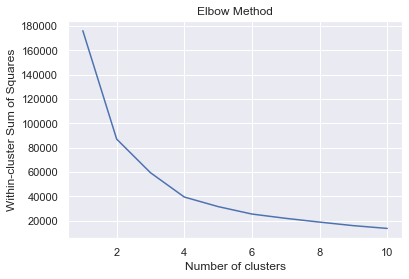

In [71]:
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Within-cluster Sum of Squares')
plt.show()

Pros and Cons of K-Means:
pros
- Simple to understand
- Fast to cluster
- Widely available
- Easy to implement
- Always yields a result

cons
- We need to pick K
- Sensitive to initialization
- Sensitive to outliers
- Produces spherical solutions (we use euclidean distance so our clusters are more spherical)
- Standardization

remedies
- The elbow method
- k-means++ (figures out the most appropriate seeds for the clustering itself)
- Remove outliers

To standardize or not to standardize?
The ultimate aim of standardization is to reduce the weight of higher numbers and increase the weight of  lower ones. Scale matters in KMeans, therefore sometimes standardization does not make sense to do. If we don't standardize the range of the values serve as weights for each variable. If we don't standardize we don't get all of the utilization out of our fields. However, there are times when you shouldn't standardize, if we know one variable is more important than the other,  than we shouldn't standardize. 

Clustering is a good way of identifying omitted variable bias, where clustering allows us to explore the data and find signficiant features that have been omitted from the model.

In [72]:
# Now let's do some Market Segmentation  with our Mall data
df

,CustomerID,Genre,Age,Annual_Income_(k$),Spending_Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


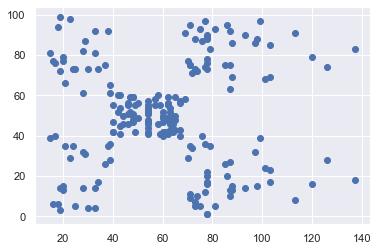

In [73]:
# We can think of five clusters perhaps. Spending score is Score assigned by the mall 
#based on customer behavior and spending nature
plt.scatter(df['Annual_Income_(k$)'], df['Spending_Score'])

In [88]:
# Select the features
x = df.iloc[:, 1:5]
x['Genre'] = x['Genre'].map({'Male': 0, 'Female': 1})

In [89]:
# Clustering
kmeans = KMeans(5)
kmeans.fit(x)

KMeans(n_clusters=5)

In [90]:
clusters = x.copy()

In [91]:
clusters['Cluster_pred'] = kmeans.fit_predict(x)

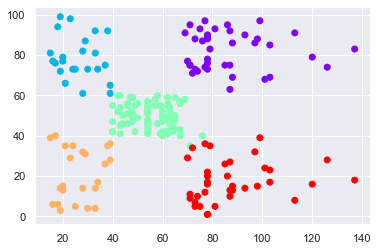

In [92]:
# Plots our clusters
plt.scatter(clusters['Annual_Income_(k$)'], clusters['Spending_Score'], 
            c=clusters['Cluster_pred'], cmap = 'rainbow')

In [93]:
# Let's standardize 
from sklearn import preprocessing
x_scaled = preprocessing.scale(x)
x_scaled

array([[-1.12815215, -1.42456879, -1.73899919, -0.43480148],
       [-1.12815215, -1.28103541, -1.73899919,  1.19570407],
       [ 0.88640526, -1.3528021 , -1.70082976, -1.71591298],
       [ 0.88640526, -1.13750203, -1.70082976,  1.04041783],
       [ 0.88640526, -0.56336851, -1.66266033, -0.39597992],
       [ 0.88640526, -1.20926872, -1.66266033,  1.00159627],
       [ 0.88640526, -0.27630176, -1.62449091, -1.71591298],
       [ 0.88640526, -1.13750203, -1.62449091,  1.70038436],
       [-1.12815215,  1.80493225, -1.58632148, -1.83237767],
       [ 0.88640526, -0.6351352 , -1.58632148,  0.84631002],
       [-1.12815215,  2.02023231, -1.58632148, -1.4053405 ],
       [ 0.88640526, -0.27630176, -1.58632148,  1.89449216],
       [ 0.88640526,  1.37433211, -1.54815205, -1.36651894],
       [ 0.88640526, -1.06573534, -1.54815205,  1.04041783],
       [-1.12815215, -0.13276838, -1.54815205, -1.44416206],
       [-1.12815215, -1.20926872, -1.54815205,  1.11806095],
       [ 0.88640526, -0.

In [94]:
wcss = []

for i in range(1, 10):    
    km = KMeans(n_clusters = i)
    km.fit(x_scaled)
    wcss.append(km.inertia_)

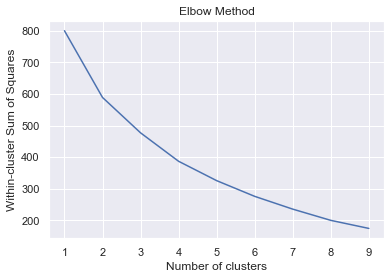

In [95]:
plt.plot(range(1, 10), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Within-cluster Sum of Squares')
plt.show()

We can see the change but we don't really know which solution is the best one. 

In [96]:
kmeans_new = KMeans(5)
kmeans_new.fit(x_scaled)
clusters_new = x.copy()
clusters_new['cluster_pred'] = kmeans_new.fit_predict(x_scaled)

In [97]:
clusters_new

,Genre,Age,Annual_Income_(k$),Spending_Score,cluster_pred
0,0,19,15,39,1
1,0,21,15,81,1
2,1,20,16,6,0
3,1,23,16,77,3
4,1,31,17,40,0
...,...,...,...,...,...
195,1,35,120,79,3
196,1,45,126,28,2
197,0,32,126,74,1
198,0,32,137,18,2


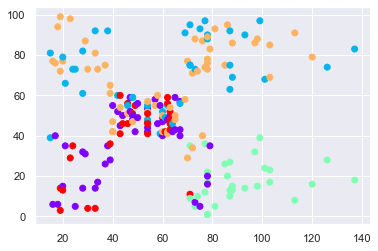

In [98]:
# Plots our clusters
plt.scatter(clusters_new['Annual_Income_(k$)'], clusters_new['Spending_Score'], 
            c=clusters_new['cluster_pred'], cmap = 'rainbow')

In this example, we see how standardization actually ruined our clusters. It is much better to not standardize because some of our variables are more important than others, and should have a higher weight.

How is clustering actually useful? Types of analysis: Exploratory, confirmatory, and explanatory. Clustering is good for exploratory analysis, but can be used for all types of analysis. One useful clustering strategy is to find the variables and values for a specific group, such as if your customer base is mostly in their 20s. Now you have a way of specifically targetting your customers better.

### Section 39
Types of clustering:
- flat 
- hierarchical

KMeans is flat, however hiererchal was actually developed first. Taxonomy of the animal kingdom is one example of clustering. There are two types of hierarchal clustering, agglomerative, bottom up, or divisive, top down.We can visualize hierarchal clustering with a dendogram

Clusters of clusters can be best visualized in a dendogram. Here is an example of a dendogram:
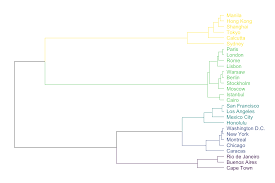

Dendogram 
Pros
- Hierarchical clustering shows al the possible linkages between clusters
- We understand the data much much better
- No need to preset the number of clusters like with k-means
- Many methods to perform hierarchical clustering

cons
- Scalability

In [102]:
data = pd.read_csv('~/Documents/GitHub/professional-development/2020 Data Science Bootcamp/Mall_Customers.csv', index_col = 'CustomerID')
x_scaled = data.copy()
x_scaled = x_scaled.drop(['Genre'], axis = 1)

In [103]:
x_scaled

,Age,Annual_Income_(k$),Spending_Score
CustomerID,,,
1,19,15,39
2,21,15,81
3,20,16,6
4,23,16,77
5,31,17,40
...,...,...,...
196,35,120,79
197,45,126,28
198,32,126,74


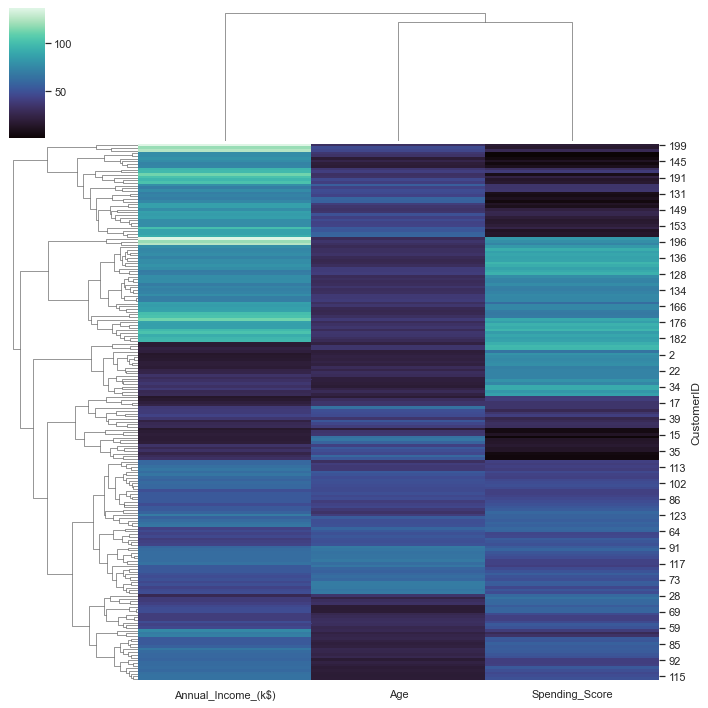

In [104]:
# Dendogram is not as useful when you have many observations
sns.clustermap(x_scaled, cmap = 'mako')